### Use the iris database to answer the following quesitons:

- What does the distribution of petal lengths look like?
- Is there a correlation between petal length and petal width?
- Would it be reasonable to predict species based on sepal width and sepal length?
- Which features would be best used to predict species?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pydataset import data

In [ ]:
iris = data('iris')
iris.shape
iris.info()

In [ ]:
# 1.a. What does the distribution of petal lengths look like?

# try distplot of iris
# ex: sns.distplot(tips.total_bill)

# sns does not like column names with . in them, rename
# ex: student_df.rename(columns={'DataYear': 'year', 'ClassGrade': 'grade'}).head(1)
iris = iris.rename(columns={'Sepal.Length': 'sepal_length', 'Sepal.Width': 'sepal_width', 'Petal.Length': 'petal_length', 'Petal.Width': 'petal_width'})
# verify rename of columns
iris.head()

# try plot again
sns.distplot(iris.petal_length)
plt.title('Distribution of petal length')

In [ ]:
# 1.b. Is there a correlation between petal length and petal width?

# relplot petal length vs petal width, add species with hue
sns.relplot(x="petal_length", y="petal_width", hue='Species', data=iris)
plt.title('Petal lenth vs Petal width')
# as petal length increases petal width increases linearly


In [ ]:
# 1.c. Would it be reasonable to predict species based on sepal width and sepal length?

# use same type plot as above, but for sepal instead of petal
sns.relplot(x="sepal_length", y="sepal_width", hue='Species', data=iris)
plt.title('Sepal lenth vs Sepal width')

# no, too much variety in sepal length and width to predict species

In [ ]:
# 1.d. Which features would be best used to predict species?

# petal length and width are best predictor of species


### Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. 

Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. 

What do you notice?

Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

In [ ]:
# 1.a use seaborn's load_dataset function to load anscombe data set

# ex. tips = sns.load_dataset('tips')
anscombe = sns.load_dataset('anscombe')

In [ ]:
anscombe.info()
anscombe.sample(20)

In [ ]:
# 1.b. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset.

# groupby dataset column with aggregate functions
grouped = anscombe.groupby('dataset').agg(['mean', 'median', 'min', 'max', 'count'])
grouped.head()

In [ ]:
# 1.c. What do you notice?

# aggregate values of x in datasets 1-3 are identical, dataset 4 has same mean as others, but variation in median, min, and max
# y aggregate values have variation in all datasets
# both x and y have 11 entries per dataset


In [ ]:
# 1.d. Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

# ex. sns.relplot(x="total_bill", y="tip", data=tips, col="time", hue="smoker")
sns.relplot(x='x', y='y', data=anscombe, col='dataset')
plt.suptitle('x and y values by dataset')

Load the InsectSprays dataset and read it's documentation. 

Create a boxplot that shows the effectiveness of the different insect sprays.

In [ ]:
# 2.a. Load the InsectSprays dataset and read it's documentation

insectsprays = data('InsectSprays')
insectsprays.sample(20)

In [ ]:
data('InsectSprays', show_doc=True)

In [ ]:
# 2.b. Create a boxplot that shows the effectiveness of the different insect sprays

# ex. sns.boxplot(data=tips, y='time', x='tip', hue='smoker')
sns.boxplot(data=insectsprays, y='count', x='spray')
plt.title('Insect count by spray type')

Load the swiss dataset and read it's documentation. Create visualizations to answer the following questions:

- Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic.
    (Choose a cutoff point for what constitutes catholic)
- Does whether or not a province is Catholic influence fertility?
- What measure correlates most strongly with fertility?

In [11]:
swiss = data('swiss')
swiss.info()
swiss.sample(20)


<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
ValdeTravers,67.6,18.7,25,7,8.65,19.5
Rive Gauche,42.8,27.7,22,29,58.33,19.3
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6
Boudry,70.4,38.4,26,12,5.62,20.3
Aubonne,66.9,67.5,14,7,2.27,19.1
Vevey,58.3,26.8,25,19,18.46,20.9
Yverdon,65.4,49.5,15,8,6.10,22.5
St Maurice,65.0,75.9,9,9,99.06,17.8
Cossonay,61.7,69.3,22,5,2.82,18.7


In [16]:
data('swiss', show_doc=True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [13]:
# 3.a. Create an attribute named is_catholic that holds a boolean value of whether or not the province
# is Catholic. (Choose a cutoff point for what constitutes catholic)


# set index to province ex.fam_df.set_index('name')
swissprov = swiss.reset_index()
swissprov = swissprov.rename(columns={'index': 'province'})
# set measure of is_catholic = 60% or more and add column
swissprov['is_catholic'] = swissprov.Catholic >= 60
swissprov

,province,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
0,Courtelary,80.2,17.0,15,12,9.96,22.2,False
1,Delemont,83.1,45.1,6,9,84.84,22.2,True
2,Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
3,Moutier,85.8,36.5,12,7,33.77,20.3,False
4,Neuveville,76.9,43.5,17,15,5.16,20.6,False
5,Porrentruy,76.1,35.3,9,7,90.57,26.6,True
6,Broye,83.8,70.2,16,7,92.85,23.6,True
7,Glane,92.4,67.8,14,8,97.16,24.9,True
8,Gruyere,82.4,53.3,12,7,97.67,21.0,True
9,Sarine,82.9,45.2,16,13,91.38,24.4,True


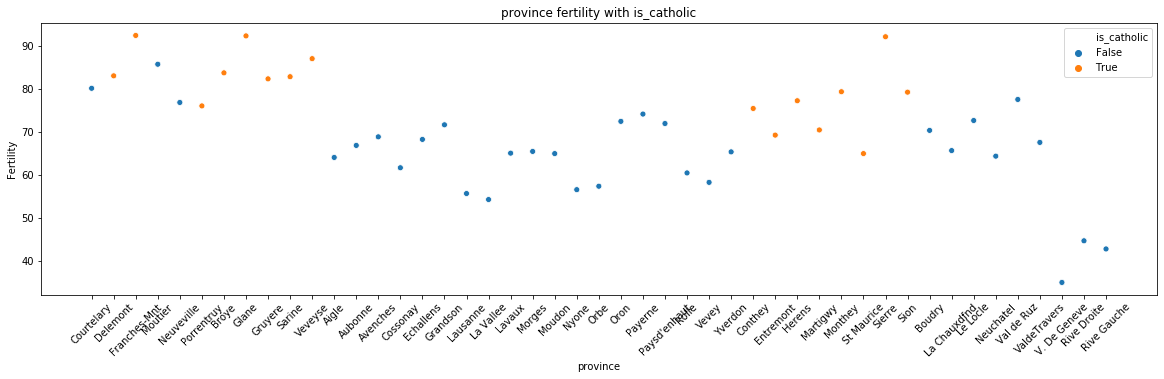

In [115]:
# 3.b. Does whether or not a province is Catholic influence fertility?

plt.figure(figsize=(20, 5))
sns.scatterplot(x='province', y='Fertility', data=swissprov, hue='is_catholic')
plt.title('province fertility with is_catholic')
plt.xticks(rotation=45)
plt.show()

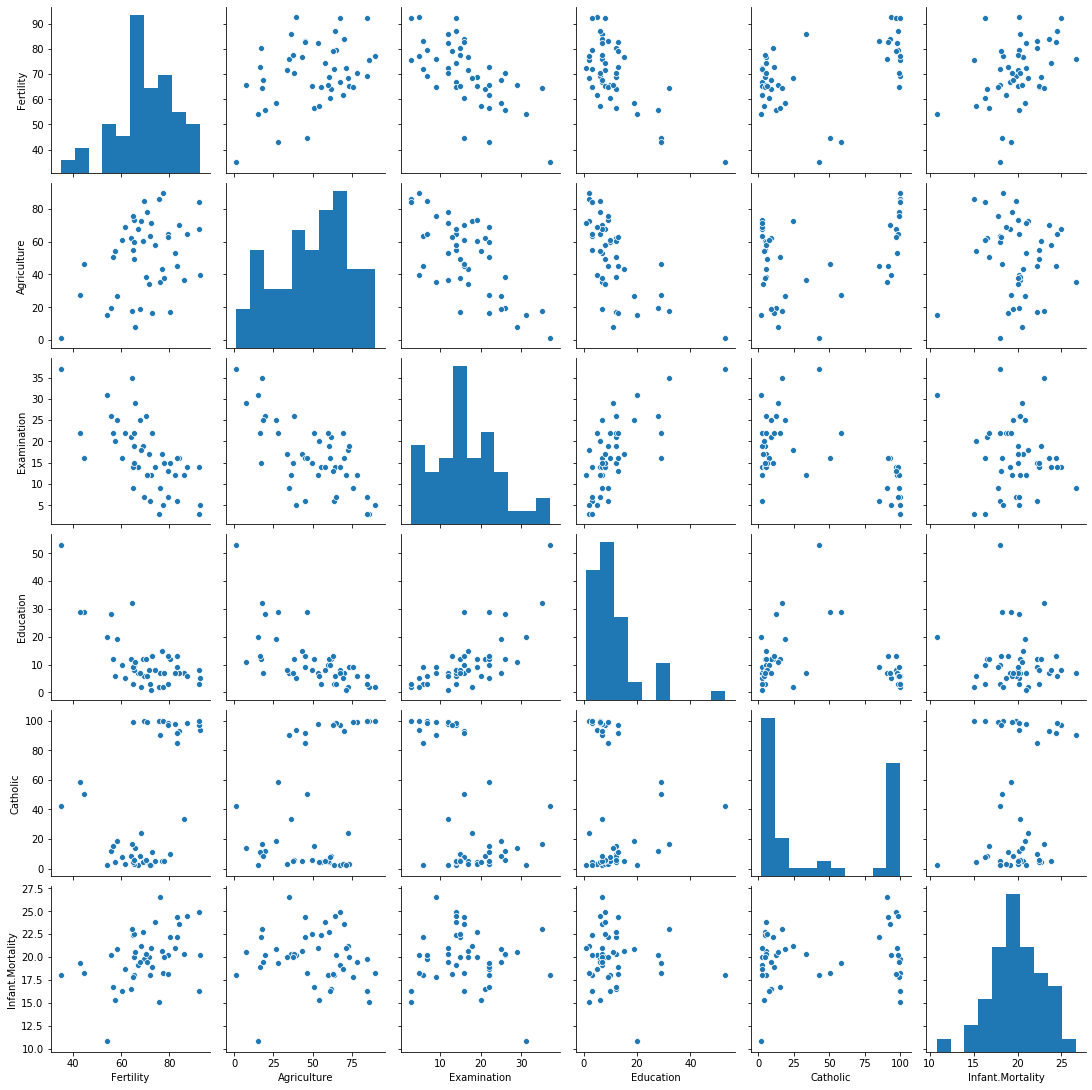

In [15]:
# 3.c. What measure correlates most strongly with fertility?

# ex.sns.pairplot(tips)
sns.pairplot(swiss)

Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.



In [25]:
# 4.
# for getting from Codeup SQL databases
def get_db_url(database):
    from env import host, user, password
    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    return url

query_chip = '''select * from orders'''
# url function
url = get_db_url('chipotle')
# assign table to df
chipdf = pd.read_sql(query_chip, url)

# clean and change item_price to float
# exobrain https://www.kite.com/python/answers/how-to-convert-a-pandas-dataframe-column-of-strings-to-floats-in-python
chipdf.item_price = chipdf.item_price.str.replace('$', '')
# example: df["A"] = pd.to_numeric(df["A"], downcast="float")
chipdf['item_price'] = pd.to_numeric(chipdf['item_price'], downcast='float')

In [40]:
# 4. continued
# get sense of data
chipdf.head()
# use group by like above, but on item price instead of quantity
chart = chipdf.groupby('item_name')[['item_price']].sum().sort_values(by='item_price', ascending=False).head(4)
chart

,item_price
item_name,
Chicken Bowl,7342.729980
Chicken Burrito,5575.819824
Steak Burrito,3851.429932
Steak Bowl,2260.189941


Text(0.5, 1.0, 'Four most popular items with revenue')

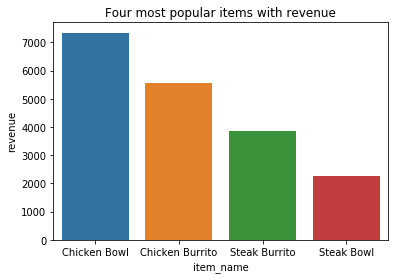

In [45]:
# 4. continued
# reset index to get 2 columns to use in barchart
graph = chart.reset_index()
# rename item_price to revenue
graph = graph.rename(columns={'item_price': 'revenue'})
graph
# create barchart
sns.barplot(x='item_name', y='revenue', data=graph)
plt.title('Four most popular items with revenue')

Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [47]:
# 5.
sleepstudy = data('sleepstudy')
sleepstudy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
 2   Subject   180 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 5.6 KB


In [48]:
data('sleepstudy', show_doc=True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [49]:
# get a sense of data, note reaction is in milliseconds (ms)
sleepstudy.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


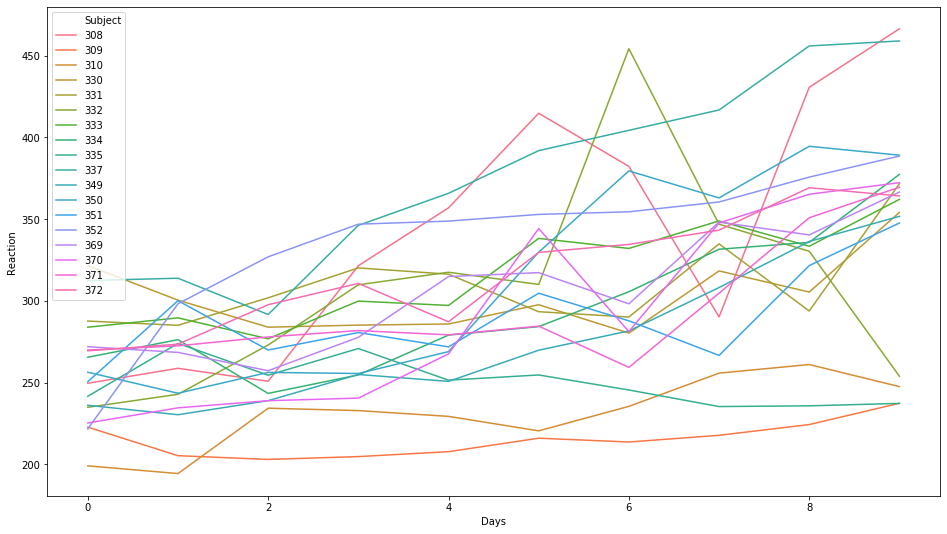

In [79]:
# plot all subjects reaction times by day
plt.figure(figsize=(16, 9))
palette = sns.color_palette("husl", 18)
sns.lineplot(x='Days', y='Reaction', data=sleepstudy, hue='Subject', legend='full', palette=palette)

In [87]:
# calculate average change in reation time by subject
# avg_sleep = sleep.groupby('Days').Reaction.agg('mean')
avg_change = sleepstudy.groupby('Days').Reaction.agg('mean')
avg_change = avg_change.reset_index()
avg_change

,Days,Reaction
0,0,256.651806
1,1,264.495756
2,2,265.361900
3,3,282.992011
4,4,288.649422
5,5,308.518456
6,6,312.178256
7,7,318.750583
8,8,336.629506
9,9,350.851222


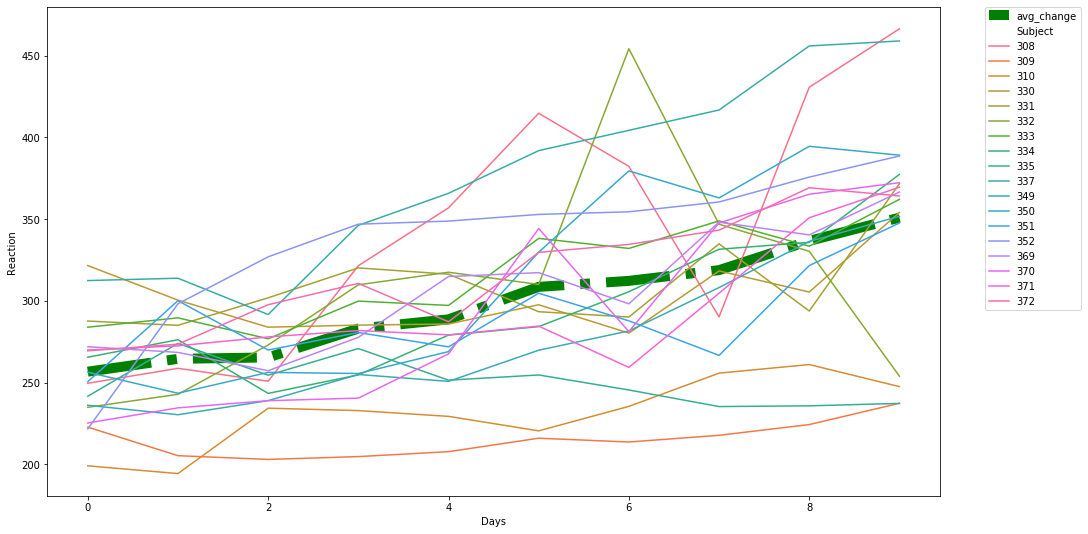

In [104]:
# plot all subjects reaction times by day
plt.figure(figsize=(16, 9)) # increase figure size
palette = sns.color_palette("husl", 18) # set color pallet
# plot line of average change
plt.plot(avg_change.index, avg_change.Reaction, linewidth=10, label='avg_change', c='green', linestyle="-.")
plt.legend('avg_change')
# plot all lines
sns.lineplot(x='Days', y='Reaction', data=sleepstudy, hue='Subject', legend='full', palette=palette)
# shift legend to outside graph
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
